# Pandas　―　データ分析
Pythonでのデータ解析の決定版とも言えるライブラリです。 特徴としては、
- 時系列データを扱うことに長けている
- numpy.ndarrayで実装されており、大量のデータでも高速に動作する
- 「分離ー適用ー結合」という思想に基づいていて、複雑なデータ解析を可能にしている
- 欠損値に対する処理を書かなくても大抵うまくやってくれる

と言った感じです。  

In [1]:
# 慣習、下の２つはよく使うからインポートしておく
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import numpy as np

# Series
Pandasの基本はSeriesとDataFrameですが、その内一列のデータ構造を表すSeriesをまず紹介します。  
イメージとしては、Excelの縦に並んだ一列のデータを表すオブジェクトだと思ってもらうといいと思います。

In [2]:
# Seriesは配列を渡すとできる、内部ではndarrayを持っているのでdtypeがある
sr = Series([1, 2, 3])
sr

0    1
1    2
2    3
dtype: int64

In [3]:
# Series.valuesを見るといつでもndarrayに戻ってこれる
sr.values

array([1, 2, 3], dtype=int64)

In [4]:
# Seriesとの演算はSeriesが返ってくる
sr + 10

0    11
1    12
2    13
dtype: int64

In [5]:
# Seriesにnameとindexを付ける（indexを明示的に与えない場合0, 1, 2,...と割り振られる）
sr = Series(np.random.rand(8), name="random", index=list("abcdefgh"))
sr

a    0.829441
b    0.813113
c    0.372857
d    0.479197
e    0.615742
f    0.086552
g    0.380832
h    0.945020
Name: random, dtype: float64

In [6]:
# 統計計算は当然持っている
sr.sum(), sr.mean()

(4.522753811725433, 0.5653442264656792)

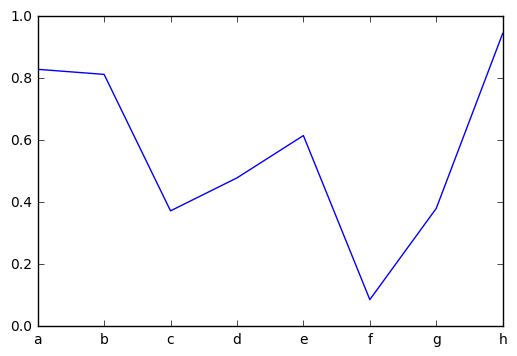

In [7]:
# インデックスをx軸にしたプロットをしてくれる
sr.plot()

In [8]:
# Seriesに対しての演算はSeriesで返ってくる
sr < 0.5

a    False
b    False
c     True
d     True
e    False
f     True
g     True
h    False
Name: random, dtype: bool

In [9]:
# bool型のSeriesをインデックスにすることで、Trueのものだけを抜き出せる
sr[sr < 0.5]

c    0.372857
d    0.479197
f    0.086552
g    0.380832
Name: random, dtype: float64

In [10]:
# indexを日付などにすると時系列が表現できる
sr_time = Series(np.random.randn(10), index=pd.date_range("2017/1/1","2017/1/10"))
sr_time

2017-01-01    1.031471
2017-01-02   -0.984666
2017-01-03    0.801980
2017-01-04    1.662475
2017-01-05    0.690337
2017-01-06    1.107603
2017-01-07    1.014095
2017-01-08    1.088339
2017-01-09    0.319599
2017-01-10   -0.229601
Freq: D, dtype: float64

In [11]:
# pandasには日付や期間を表すオブジェクトが充実している（これは1秒ごとのインデックスを作ったもの）
pd.date_range("2017/1/1/0:0", "2017/1/1/10:00", freq="S")

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01',
               '2017-01-01 00:00:02', '2017-01-01 00:00:03',
               '2017-01-01 00:00:04', '2017-01-01 00:00:05',
               '2017-01-01 00:00:06', '2017-01-01 00:00:07',
               '2017-01-01 00:00:08', '2017-01-01 00:00:09',
               ...
               '2017-01-01 09:59:51', '2017-01-01 09:59:52',
               '2017-01-01 09:59:53', '2017-01-01 09:59:54',
               '2017-01-01 09:59:55', '2017-01-01 09:59:56',
               '2017-01-01 09:59:57', '2017-01-01 09:59:58',
               '2017-01-01 09:59:59', '2017-01-01 10:00:00'],
              dtype='datetime64[ns]', length=36001, freq='S')

In [12]:
# スライスと同じ記法で日付の範囲を抜き出せる
sr_time["2017/1/5":]

2017-01-05    0.690337
2017-01-06    1.107603
2017-01-07    1.014095
2017-01-08    1.088339
2017-01-09    0.319599
2017-01-10   -0.229601
Freq: D, dtype: float64

### 欠損値を含む場合
デフォルトだと、平均などは欠損値を覗いて計算されます。  
データが汚い場合でも、データの整理に時間を取られず、本当にやりたい解析に集中することが出来ます。

In [13]:
# ３つ目に欠損値「None」、numpy.nanに変換され、dtypeはfloatとして扱える
sr = Series([1.0, 0.7, None, 3.9, -0.4])
sr

0    1.0
1    0.7
2    NaN
3    3.9
4   -0.4
dtype: float64

In [14]:
# 平均は欠損値を除いて計算されている（大抵の場合、理想的な処理）
sr.mean()

1.2999999999999998

# DataFrame
Seriesが一列だとすれば、DataFrameは複数の列を持つデータ構造をしています。  
イメージとして、Excelのようなデータ構造をndarrayで保持しているというのが近いと思います。  
一つ一つの要素を書き換えるような手動の処理はExcelの方が素早く出来ますが、一括計算をしたいときはDataFrameの方が遥かに素早く計算できます。

In [15]:
# 辞書型を引数にとり、DataFrameオブジェクトを返す。
df = DataFrame(
    {
        "A": [1, 2, 3, -1],
        "B": ["apple", "orange", "banana", "apple"],
        "C": [False, True, True, True],
    })
df

,A,B,C
0,1,apple,False
1,2,orange,True
2,3,banana,True
3,-1,apple,True


In [16]:
# DataFrameに含まれるSeriesのnameはcolumnsで参照できる
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [17]:
# columnsをキーワード引数で与える場合、インデックスごとのデータのリストを渡す
df = DataFrame(
    [
        [1, "apple", False],
        [2, "orange", True],
        [3, "banana", True],
        [-1, "apple", True],
    ], columns=["A", "B", "C"])
df

,A,B,C
0,1,apple,False
1,2,orange,True
2,3,banana,True
3,-1,apple,True


In [18]:
# Seriesは属性のように呼び出せる
df.B # または df["B"]

0     apple
1    orange
2    banana
3     apple
Name: B, dtype: object

In [19]:
# 複数の列を抜き出したDataFrameを作る
df[["A", "C"]]

,A,C
0,1,False
1,2,True
2,3,True
3,-1,True


In [20]:
# Series 'C'の値がTrueのものだけをDataFrameとして抜き出す
df[df.C]

,A,B,C
1,2,orange,True
2,3,banana,True
3,-1,apple,True


In [21]:
# Bがappleのものだけを抜き出す
df[df.B == "apple"]

,A,B,C
0,1,apple,False
3,-1,apple,True


In [22]:
# Bがappleかつ、CがTrueのものだけを抜き出す
df[(df.B == "apple") & df.C]

,A,B,C
3,-1,apple,True


In [23]:
# DataFrameへのSeriesの追加はこのようにする
df["D_new"] = df.A ** 2
df

,A,B,C,D_new
0,1,apple,False,1
1,2,orange,True,4
2,3,banana,True,9
3,-1,apple,True,1


In [24]:
# メソッドを呼ぶと列ごとに値を計算する
df.sum()

A                             5
B        appleorangebananaapple
C                             3
D_new                        15
dtype: object

In [25]:
# DataFrameの統計量をまとめて出す
df = DataFrame({"rand": np.random.rand(1000),  "randn": np.random.randn(1000)})
df.describe()

,rand,randn
count,1000.000000,1000.000000
mean,0.495566,0.063610
std,0.287009,0.989672
min,0.000279,-2.755437
25%,0.255977,-0.605201
50%,0.490683,0.106608
75%,0.733955,0.720362
max,0.999750,2.954072


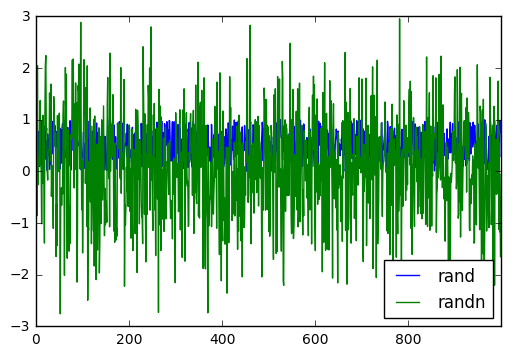

In [26]:
# DataFrameのプロット：何も指定しないと各Seriesを重ねてプロットする
df.plot()

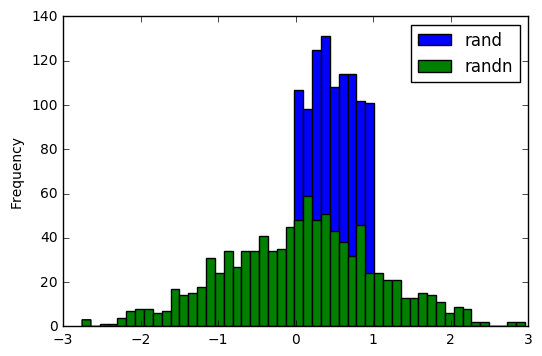

In [27]:
# ヒストグラムなどはkindで指定する。 「df.plot?」を見ると詳細あり。
df.plot(kind="hist", bins=50)

# 分離ー適用ー結合
Pandasが得意としているのは、ある条件でデータを分類し、その特徴を調べるという処理です。具体的には、
1. DataFrame.groupbyメソッドで小さいDataFrameに分割
1. グループごとに計算を行う
1. それらを集めてグループごとの計算結果を表示する

という流れとなります。  
どういうgroupに分けるか、分けたDataFrameでどのような計算を行うかは解析の最も難しく面白いところだと思います。  
このあたりの手法は[Group By: split-apply-combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html)を参考にしました。

## DataFrame.groupby
引数で与えた列をkeyとして、分割してDataFrameGroupByオブジェクトを返す関数です（**分割**）。

In [28]:
df = DataFrame({"key1": np.random.choice(list("abc"), 15), "value1": np.random.randn(15), "value2": np.random.rand(15)})
df

,key1,value1,value2
0,c,0.875058,0.711523
1,c,1.096554,0.268373
2,c,-0.510642,0.742575
3,b,0.507218,0.825549
4,b,-1.145997,0.114212
5,a,0.877881,0.821241
6,c,-0.799880,0.123966
7,a,0.349807,0.853116
8,b,0.201471,0.106149
9,c,-0.370557,0.062032


In [29]:
# key1をkeyとしてグループに分割する
grouped = df.groupby("key1")
grouped

### DataFrameGroupByオブジェクト
イテレータであり、for ~ in ...の...に置くと、グループ名と分割されたDataFrameを取り出すことが出来ます。

In [30]:
for _name, _df in grouped:
    print(_name)
    print(_df)
    print()

a
  key1    value1    value2
5    a  0.877881  0.821241
7    a  0.349807  0.853116

b
   key1    value1    value2
3     b  0.507218  0.825549
4     b -1.145997  0.114212
8     b  0.201471  0.106149
11    b  1.424233  0.446387
12    b  0.257466  0.515953
13    b  0.345895  0.342960
14    b -0.737887  0.170617

c
   key1    value1    value2
0     c  0.875058  0.711523
1     c  1.096554  0.268373
2     c -0.510642  0.742575
6     c -0.799880  0.123966
9     c -0.370557  0.062032
10    c  0.901749  0.615225



In [31]:
# get_groupで特定のkeyを持つDataFrameを取得する
grouped.get_group("a")

,key1,value1,value2
5,a,0.877881,0.821241
7,a,0.349807,0.853116


DataFrameGroupByオブジェクトのメソッドを呼び出すことで、分割された各DataFrameで計算されます（**適用**）。  
最終的に、グループごとに計算を行った結果がまとめられます（**結合**）。

In [32]:
# グループごとの平均値
grouped.mean()

,value1,value2
key1,,
a,0.613844,0.837178
b,0.121771,0.360261
c,0.198714,0.420616


自作関数を各列に適用するためにはaggメソッドを使います。

In [33]:
# 自作関数
def func(values):
    
    # どのように適用されているか知るため、型を調べる
    print(type(values))
    print(values.name)
    
    # スカラーを返す
    return values.sum()

# 分割されたDataFrameの各Seriesに適用されていることが分かる
grouped.agg(func)

<class 'pandas.core.series.Series'>
value1
<class 'pandas.core.series.Series'>
value1
<class 'pandas.core.series.Series'>
value1
<class 'pandas.core.series.Series'>
value2
<class 'pandas.core.series.Series'>
value2
<class 'pandas.core.series.Series'>
value2


,value1,value2
key1,,
a,1.227688,1.674357
b,0.852400,2.521827
c,1.192283,2.523694


# 「分離ー適用ー結合」の一例
[文字列操作](./文字列操作.html)でも使った国勢調査をもとにした人口推移のCSVを再び使います。  
このデータの中には、都道府県別の人口推移もあるので、pandasで解析してみましょう。  
とりあえず
- 都道府県別の人口増減を一次近似で求め、その勾配ランキングを作る

という目的でやってみましょう。

In [34]:
# 最初の５行を出力
with open("c01.csv", "r", encoding="utf-8") as fp:
    for line in fp.readlines()[:5]:
        print(line)

﻿"都道府県コード","都道府県名","元号","和暦（年）","西暦（年）","注","人口（総数）","人口（男）","人口（女）"

"00","全国","大正",9,1920,"",55963053,28044185,27918868

"01","北海道","大正",9,1920,"",2359183,1244322,1114861

"02","青森県","大正",9,1920,"",756454,381293,375161

"03","岩手県","大正",9,1920,"",845540,421069,424471



pandasだとcsvを一行で読み込むことが出来ます（エンコードは適当に探す）

In [35]:
# 一行でcsvファイルをDataFrameに変換できる
df = pd.read_csv("c01.csv", encoding="utf-8", skipfooter=2, engine="python")
df

,"﻿""都道府県コード""",都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
0,00,全国,大正,9,1920,NaN,55963053,28044185,27918868
1,01,北海道,大正,9,1920,NaN,2359183,1244322,1114861
2,02,青森県,大正,9,1920,NaN,756454,381293,375161
3,03,岩手県,大正,9,1920,NaN,845540,421069,424471
4,04,宮城県,大正,9,1920,NaN,961768,485309,476459
5,05,秋田県,大正,9,1920,NaN,898537,453682,444855
6,06,山形県,大正,9,1920,NaN,968925,478328,490597
7,07,福島県,大正,9,1920,NaN,1362750,673525,689225
8,08,茨城県,大正,9,1920,NaN,1350400,662128,688272
9,09,栃木県,大正,9,1920,NaN,1046479,514255,532224


In [36]:
# dfのSeriesを確認
df.columns

Index(['﻿"都道府県コード"', '都道府県名', '元号', '和暦（年）', '西暦（年）', '注', '人口（総数）', '人口（男）',
       '人口（女）'],
      dtype='object')

In [37]:
# 各Seriesのdtypeの確認
df.dtypes

﻿"都道府県コード"    object
都道府県名         object
元号            object
和暦（年）          int64
西暦（年）          int64
注             object
人口（総数）        object
人口（男）         object
人口（女）         object
dtype: object

dtypeを確認すると、人口がobject（つまり文字列）としてデータを持ってしまっていました。  
pandasだと数値として認識してくれるとうまくキャストしてくれると思ってましたがなぜでしょうか？

pd.to_numericという関数はSeriesを数値にキャストしてSeriesを返します。  
実行してみると、不可解なエラーが出ました。

In [38]:
# 人口のSeriesをそれぞれ数値にキャストする
for _name in df.columns[-3:]:
    print(_name)
#     df[_name] = pd.to_numeric(df[_name])  # <== これがエラーを出す

        # ValueError: Unable to parse string

人口（総数）
人口（男）
人口（女）


こういうときは、遡ってエラーの原因を探るのが大事です。  
一個ずつ数値にキャストして最初にエラーを出すところを調べましょう。

In [39]:
for num in df["人口（総数）"]:
    last = num
    int(num)

ValueError: invalid literal for int() with base 10: '-'

In [40]:
# エラーを吐き出した値
num

'-'

エラーを吐き出していた原因は、欠損値が-で表されていたことで、pandasが自動で欠損値として認識できなかったからだと分かりました。

pd.to_numeric?をみると
>Signature: pd.to_numeric(arg, errors='raise')

>errors : {'ignore', 'raise', 'coerce'}, default 'raise'
>    - If 'raise', then invalid parsing will raise an exception
>    - If 'coerce', then invalid parsing will be set as NaN
 >   - If 'ignore', then invalid parsing will return the input
 
errors="coerce"とキーワード引数を与えてやれば、キャストできないものを欠損値として置き換えてくれるそうです。  
デフォルトではエラーを吐き出すという設定になっていますね。

In [41]:
# 最初の５行のみ表示
pd.to_numeric(df["人口（総数）"], errors="coerce").head()

0    55963053.0
1     2359183.0
2      756454.0
3      845540.0
4      961768.0
Name: 人口（総数）, dtype: float64

とりあえず変換は出来たようです。  
numpyのintには欠損値を表す変数はないらしく、float64で解析をすることにします。

In [42]:
# 各Seriesを文字列から数値に変換
for _name in df.columns[-3:]:
    print(_name)
    df[_name] = pd.to_numeric(df[_name], errors="coerce")

人口（総数）
人口（男）
人口（女）


In [43]:
df.dtypes

﻿"都道府県コード"     object
都道府県名          object
元号             object
和暦（年）           int64
西暦（年）           int64
注              object
人口（総数）        float64
人口（男）         float64
人口（女）         float64
dtype: object

dtypeもうまく変換できてますね。  
pd.read_csvが欠損値として認識するのは
> ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’,  
> ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘nan’

らしいので、今回は珍しいケースに出会ってしまったのかもしれません。  
気を取り直して解析を続けましょう。  
都道府県名を重複を除いてみると

In [44]:
# 組み込み関数のset()と似た働き
df["都道府県名"].unique()

array(['全国', '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県', '人口集中地区', '人口集中地区以外の地区'], dtype=object)

都道府県別の時系列を見てみたいので、都道府県以外は取り除きましょう。  
DataFrame.dropはindexが引数に一致している行を削除したDataFrameを返す関数です。

In [45]:
# dropするためにindexを変更する（コピーを伴わないので高速）
df.index = df["都道府県名"]

# indexが引数に一致していたらその行を削除する
df = df.drop(["全国", '人口集中地区', '人口集中地区以外の地区'])
df

,"﻿""都道府県コード""",都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
都道府県名,,,,,,,,,
北海道,01,北海道,大正,9,1920,NaN,2359183.0,1244322.0,1114861.0
青森県,02,青森県,大正,9,1920,NaN,756454.0,381293.0,375161.0
岩手県,03,岩手県,大正,9,1920,NaN,845540.0,421069.0,424471.0
宮城県,04,宮城県,大正,9,1920,NaN,961768.0,485309.0,476459.0
秋田県,05,秋田県,大正,9,1920,NaN,898537.0,453682.0,444855.0
山形県,06,山形県,大正,9,1920,NaN,968925.0,478328.0,490597.0
福島県,07,福島県,大正,9,1920,NaN,1362750.0,673525.0,689225.0
茨城県,08,茨城県,大正,9,1920,NaN,1350400.0,662128.0,688272.0
栃木県,09,栃木県,大正,9,1920,NaN,1046479.0,514255.0,532224.0


In [46]:
# 人口のSeriesはよく参照するので名前をつけておく
pops = df.columns[-3:]
p_all, p_man, p_woman = pops
pops

Index(['人口（総数）', '人口（男）', '人口（女）'], dtype='object')

さて、解析のための準備が整いました。  
都道府県名をkeyにしてgroupbyし、その勾配を求める自作関数を作れば良さそうです。  
indexはこれから時系列として扱うので西暦に変更しておきます。

In [47]:
df.index = df['西暦（年）']
gb = df.groupby("都道府県名")

試しに一つ目のDataFrameをプロットしてみます。

三重県


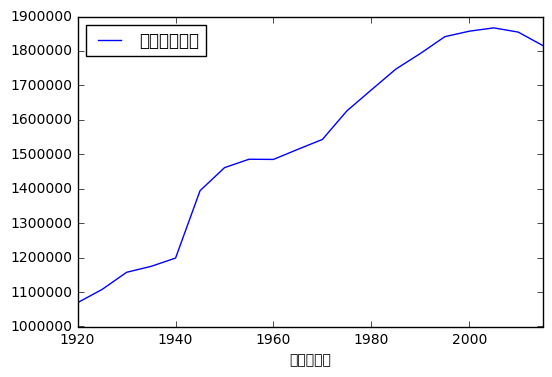

In [48]:
# イテレータをリストにキャストすると値にアクセスできる
_name, _df = list(gb)[0]
print(_name)

# 人口（総数）をプロット
_df.plot(y=["人口（総数）"], )

さて、このDataFrameから人口増減勾配を求める方法を考えましょう。  
そのような方法はたくさんありますが今回は擬似逆行列を使って素早く求めましょう。  
$$d=Gm$$
のとき$、G^\dagger$を擬似逆行列とすると
$$m=G^\dagger d$$
となります。  

In [49]:
# x軸として年を取る
x = _df.index.values

# Green関数（直線なのでパラメータ２つ）
G = np.vstack((x, np.ones_like(x))).T
d = _df["人口（総数）"].values

# 直線のパラメータ（np.linalg.pinvは疑似逆行列を求める関数）
params = np.linalg.pinv(G) @ d
params

array([  9.10034075e+03,  -1.63708990e+07])

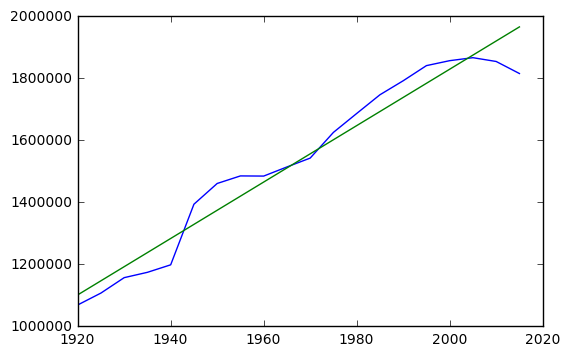

In [50]:
# プロットしてみる
import matplotlib.pyplot as plt
plt.plot(x, d)
plt.plot(x, G @ params)

うまく直線が引けています。これを見ると無限に増えていくので一次近似は無理があることが分かります。  
今回はとりあえず単純に勾配だけを計算することにしているので、これを関数として定義します。

In [51]:
# Seriesを受け取って、勾配を返す関数
def calc_slope(_sr):
    
    # x軸として年を取る
    x = _sr.index.values
    # Green関数（直線なのでパラメータ２つ）
    G = np.vstack((x, np.ones_like(x))).T
    d = _sr.values

    # 直線のパラメータ
    params = np.linalg.pinv(G) @ d
    
    # 勾配のみを返す
    return params[0]

In [52]:
gb[pops].agg(calc_slope).rename(columns={p_all: "slope_all", p_man: "slope_man", p_woman: "slope_woman"})

,slope_all,slope_man,slope_woman
都道府県名,,,
三重県,9100.340752,4410.786917,4689.553835
京都府,15529.986617,7108.792782,8421.193835
佐賀県,1806.813083,722.221805,1084.591278
兵庫県,39889.076992,18437.361504,21451.715489
北海道,36862.745263,15877.846165,20984.899098
千葉県,63004.052331,31856.150977,31147.901353
和歌山県,2771.415188,1091.590376,1679.824812
埼玉県,76926.165564,39078.812481,37847.353083
大分県,3172.518947,1291.037744,1881.481203


沖縄が欠損値を含んでいるようなので、自作関数で欠損値を落として計算するようにします。

In [53]:
# Seriesを受け取って、勾配を返す関数
def calc_slope_new(_sr):
    
    # ------------追加----------------
    # 欠損値をSeriesの中から取り除く
    _sr = _sr.dropna()
    # ----------追加終わり-----------
    
    # x軸として年を取る
    x = _sr.index.values
    # Green関数（直線なのでパラメータ２つ）
    G = np.vstack((x, np.ones_like(x))).T
    d = _sr.values

    # 直線のパラメータ
    params = np.linalg.pinv(G) @ d
    
    # 勾配のみを返す
    return params[0]

In [54]:
# もう一度、グループに適用、結合
df_res = gb[pops].agg(calc_slope_new).rename(columns={p_all: "slope_all", p_man: "slope_man", p_woman: "slope_woman"})
df_res

,slope_all,slope_man,slope_woman
都道府県名,,,
三重県,9100.340752,4410.786917,4689.553835
京都府,15529.986617,7108.792782,8421.193835
佐賀県,1806.813083,722.221805,1084.591278
兵庫県,39889.076992,18437.361504,21451.715489
北海道,36862.745263,15877.846165,20984.899098
千葉県,63004.052331,31856.150977,31147.901353
和歌山県,2771.415188,1091.590376,1679.824812
埼玉県,76926.165564,39078.812481,37847.353083
大分県,3172.518947,1291.037744,1881.481203


ようやく、勾配を都道府県ごと、ついでに性別別にも求まりました。  
slope_allでソートしてみましょう。

In [55]:
df_res_sorted = df_res.sort_values(by="slope_all", ascending=False)
df_res_sorted

,slope_all,slope_man,slope_woman
都道府県名,,,
東京都,105668.266165,50803.712180,54864.553985
神奈川県,98980.093383,49875.805113,49104.288271
大阪府,77432.582406,36436.377895,40996.204511
埼玉県,76926.165564,39078.812481,37847.353083
愛知県,64413.445865,32564.712782,31848.733083
千葉県,63004.052331,31856.150977,31147.901353
兵庫県,39889.076992,18437.361504,21451.715489
北海道,36862.745263,15877.846165,20984.899098
福岡県,33261.924962,14773.350376,18488.574586


完成です。  
今回は都道府県別を調べましたが、データさえあれば、（コードをほとんど変えずに）市町村でもできることが分かってもらえると思います。  
このようにpandasには汎用性の高い機能がたくさんあり、それらを組み合わせる技術が問われていくのだろうと思います。  

# もっとPandasを知りたい人へ
参考にしてほしい本として「[Pythonによるデータ分析入門](https://www.oreilly.co.jp/books/9784873116556/)（O'REILLY）」があります。  
これはPandasを作った人の本であり、（当然ながら）Pandasについてとても詳細に書かれています。  
読んだら当然理解できるはずですが、読まなくてもPandasを使いながらググったり、ドキュメントを読んでいると自然と必要な機能は分かってくると思います。